# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib


# Import API key
api_key = "af5087ba7bf9f0461a5b888ee4ad005c"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    city_url = url + "&q=" + urllib.request.pathname2url(city)
   
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
   
    record_count += 1
   
    try:
        city_weather = requests.get(url+"&q="+city).json()
        city_lng = city_weather["coord"]["lon"]
        city_lat = city_weather["coord"]["lat"]
        city_date = city_weather["dt"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_humidity = city_weather["main"]["humidity"]
        city_country = city_weather["sys"]["country"]
        city_data.append({"City": city, "Lat": city_lat, "Lng": city_lng, 
                         "Max Temp": city_max_temp,"Humidity": city_humidity, "Cloudiness": city_clouds, 
                         "Wind Speed": city_wind, "Country": city_country, "Date": city_date})
   
    except:
        pass

print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | taolanaro
Processing Record 3 of Set 1 | nizhneyansk
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | zhaoyang
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | sur
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | burica
Processing Record 12 of Set 1 | comodoro rivadavia
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | ilhabela
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | amapa
Processing Record 20 of Set 1 | toora-khem
Processing Record 21 of Set 1 | palaiokhora
Processing Record 22 of Set 1 | portree
Processing Record 23 of Set 1 | hob

Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | pasighat
Processing Record 49 of Set 4 | hithadhoo
Processing Record 0 of Set 5 | sentyabrskiy
Processing Record 1 of Set 5 | airai
Processing Record 2 of Set 5 | itarema
Processing Record 3 of Set 5 | loukhi
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | dymer
Processing Record 6 of Set 5 | mys shmidta
Processing Record 7 of Set 5 | inhambane
Processing Record 8 of Set 5 | tommot
Processing Record 9 of Set 5 | gulshat
Processing Record 10 of Set 5 | sao filipe
Processing Record 11 of Set 5 | faanui
Processing Record 12 of Set 5 | cidreira
Processing Record 13 of Set 5 | nishihara
Processing Record 14 of Set 5 | vila velha
Processing Record 15 of Set 5 | agadez
Processing Record 16 of Set 5 | tasiilaq
Processing Record 17 of Set 5 | massakory
Processing Record 18 of Set 5 | rawannawi
Processing Record 19 of Set 5 | wick
Processing Record 20 of Set 5 | torit
Processing Record 21 of Set

Processing Record 46 of Set 8 | mukhen
Processing Record 47 of Set 8 | stillwater
Processing Record 48 of Set 8 | aripuana
Processing Record 49 of Set 8 | bintulu
Processing Record 0 of Set 9 | kapoeta
Processing Record 1 of Set 9 | haines junction
Processing Record 2 of Set 9 | arlit
Processing Record 3 of Set 9 | tres arroyos
Processing Record 4 of Set 9 | alofi
Processing Record 5 of Set 9 | sungairaya
Processing Record 6 of Set 9 | punakha
Processing Record 7 of Set 9 | crab hill
Processing Record 8 of Set 9 | parana
Processing Record 9 of Set 9 | vadso
Processing Record 10 of Set 9 | mandan
Processing Record 11 of Set 9 | hualmay
Processing Record 12 of Set 9 | bolobo
Processing Record 13 of Set 9 | amga
Processing Record 14 of Set 9 | umm durman
Processing Record 15 of Set 9 | angoche
Processing Record 16 of Set 9 | montepuez
Processing Record 17 of Set 9 | san blas
Processing Record 18 of Set 9 | korem
Processing Record 19 of Set 9 | lubsko
Processing Record 20 of Set 9 | housto

Processing Record 43 of Set 12 | salinopolis
Processing Record 44 of Set 12 | taperoa
Processing Record 45 of Set 12 | port-de-paix
Processing Record 46 of Set 12 | manavgat
Processing Record 47 of Set 12 | sao felix do xingu
Processing Record 48 of Set 12 | lisakovsk
----------------------------
Data Retrieval Complete     
----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]
humidity = city_data_pd["Humidity"]
max_temps = city_data_pd["Max Temp"]

city_data_pd.count()

City          522
Cloudiness    522
Country       522
Date          522
Humidity      522
Lat           522
Lng           522
Max Temp      522
Wind Speed    522
dtype: int64

In [6]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,georgetown,56,GY,1536904263,86,6.80,-58.16,79.04,7.61
1,saint george,20,GR,1536902400,68,39.45,22.34,66.20,3.36
2,zhaoyang,48,CN,1536904524,84,42.68,126.03,75.62,4.47
3,port alfred,0,ZA,1536904381,92,-33.59,26.89,60.77,7.94
4,mataura,8,NZ,1536904378,58,-46.19,168.86,57.08,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

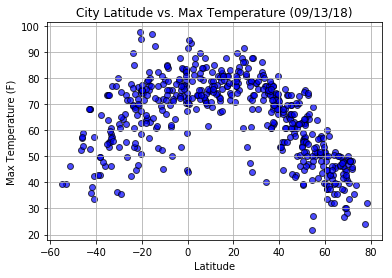

In [7]:
plt.scatter(lats, max_temps, color="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.7, label="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#### Latitude vs. Humidity Plot

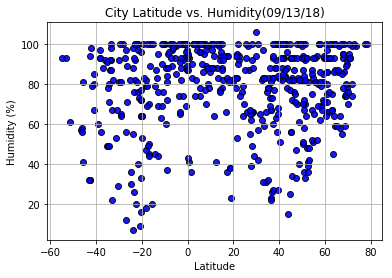

In [8]:
plt.scatter(lats, humidity, color="blue", edgecolor="black", linewidths=1, marker="o", alpha = 0.9, label="Cities")
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

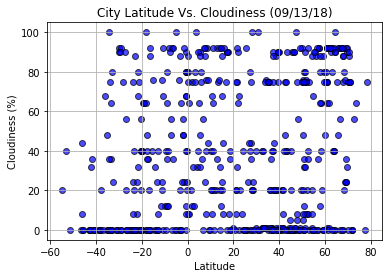

In [9]:
plt.scatter(lats, cloudiness, color="blue", edgecolor="black", linewidths=1, marker="o", alpha = 0.7,label="Cities")
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

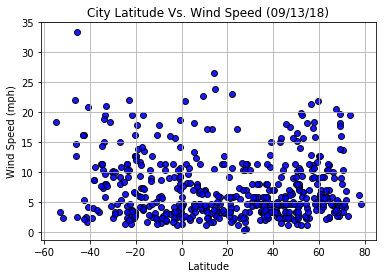

In [10]:
plt.scatter(lats, wind_speed, color="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.9, label="Cities")
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)